In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

In [2]:
LP=pd.read_csv('loan_prediction.csv')

In [3]:
LP.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
LP.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
LP.shape

(614, 13)

In [6]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
LP.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
LP.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 1.0, 'Loan status count distribution')

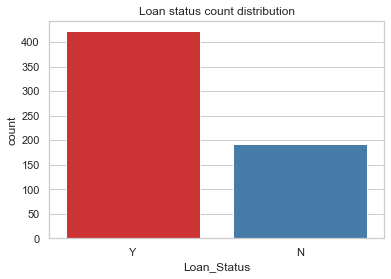

In [9]:
# Visual Representation of the dependent variable distribution in the dataset
LP_c=LP['Loan_Status']
sns.countplot(x=LP_c, data=LP, palette="Set1")
plt.title("Loan status count distribution")

Text(0.5, 1.0, 'Gender based Loan status count distribution')

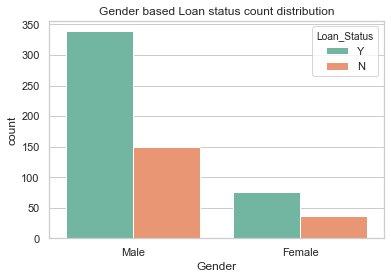

In [10]:
LP_c=LP['Gender']
sns.countplot(x=LP_c, data=LP, hue= 'Loan_Status', palette="Set2")
plt.title("Gender based Loan status count distribution")

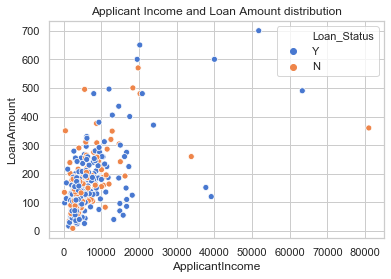

In [11]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=LP)  
plt.title('Applicant Income and Loan Amount distribution')  
plt.show() 

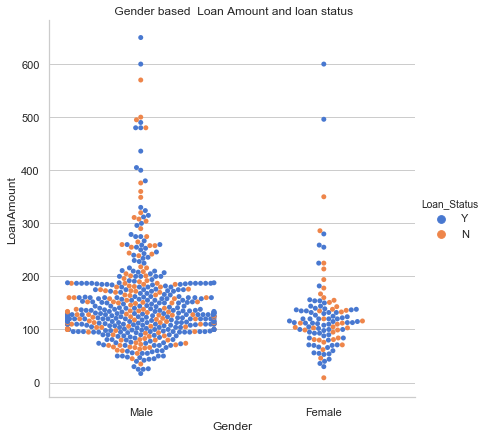

In [12]:
# Plot Total working experience based on gender wrt Attrition 
sns.catplot(x="Gender", y="LoanAmount", data=LP, kind="swarm", 
            hue= 'Loan_Status', height=6, aspect=1)
                                                     
plt.title(' Gender based  Loan Amount and loan status') 
plt.show()

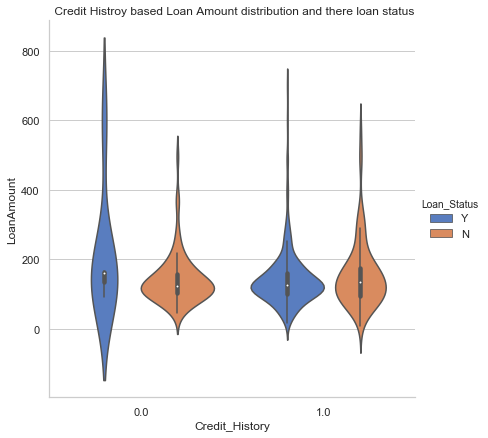

In [13]:
# Plot Total working experience based on gender wrt Attrition 
sns.catplot(x="Credit_History", y="LoanAmount", data=LP, kind="violin", 
            hue= 'Loan_Status', height=6, aspect=1, color_codes=True)
                                                     
plt.title(' Credit Histroy based Loan Amount distribution and there loan status') 
plt.show()

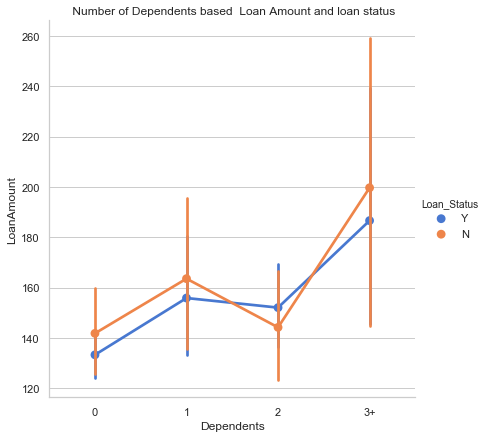

In [14]:
# Plot Total working experience based on gender wrt Attrition 
sns.catplot(x="Dependents", y="LoanAmount", data=LP, kind="point", 
            hue= 'Loan_Status', height=6, aspect=1)
                                                     
plt.title(' Number of Dependents based  Loan Amount and loan status') 
plt.show()

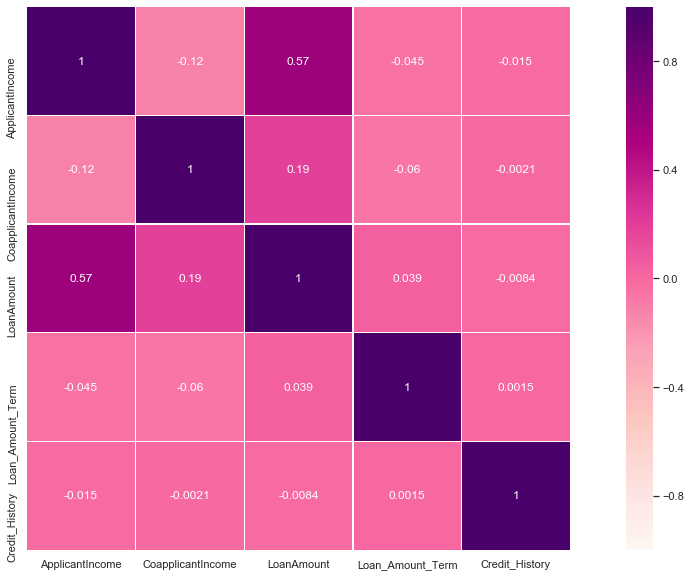

In [15]:
# Analysis the correlation in the HR dataset
LP_corr = LP.corr()

plt.figure(figsize=(20, 10))

sns.heatmap(LP_corr[(LP_corr >= 0.5) | (LP_corr <= 0.2)], 
            cmap='RdPu', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 12}, square=True)
plt.show()

In [16]:
LP.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
LP.dropna(inplace=True)

In [18]:
LP = LP.drop(['Loan_ID'], axis=1)

In [19]:
LP.replace({'Dependents': {'3+': 3}}, inplace=True)

In [20]:
LP.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [21]:
# Encode categorical variables of feature dataset
LP=pd.get_dummies(LP)

In [22]:
LP.shape

(480, 21)

In [23]:
# Lets divide dataset into target and feature set
x=LP.drop(['Loan_Status'], axis=1)
y=LP['Loan_Status'].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(480, 20)
(480, 1)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import time

models = []
models.append(("Random Forest", RandomForestClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))

In [27]:
results = []
names = []
for name,model in models:
    strat_fold = StratifiedKFold(n_splits=10, random_state=52, shuffle=True)
    cv_result = cross_val_score(model,x_train,y_train, cv = strat_fold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())
print('******************************************************************************************************')
for i in range(len(names)):
    print(names[i],results[i].std())

Random Forest 0.7679858299595143
XGB 0.8098852901484481
LGBM 0.8071221322537113
ADA 0.7996929824561403
******************************************************************************************************
Random Forest 0.035373371555362805
XGB 0.0604720263627384
LGBM 0.053912854224314674
ADA 0.05724650077421915


In [28]:
name = []
for name,model in models:
    print('*****************************', name, '***********************************************')
    model.fit(x_train, y_train)
    clf_prediction = model.predict(x_test)
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",model,":\n", _conf_matrix)
    print("Accuracy: \n {}".format (accuracy_score(y_test, clf_prediction)))
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))

***************************** Random Forest ***********************************************
Confusion matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) :
 [[21 14]
 [ 9 52]]
Accuracy: 
 0.7604166666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.79      0.85      0.82        61

    accuracy                           0.76        96
   macro avg       0.74      0.73      0.73        96
weighted avg       0.76      0.76      0.76     

# Let's Try Neural Netwotk Model on Loan Fraud Detection Dataset.

In [29]:
from sklearn.model_selection import GridSearchCV
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [30]:
def create_model(lyrs=[10], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [31]:
# Create model and print summary
model = create_model()
print(model.summary())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# train model on full train set, with 80/20 cross validation split
training = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))



val_acc: 76.40%


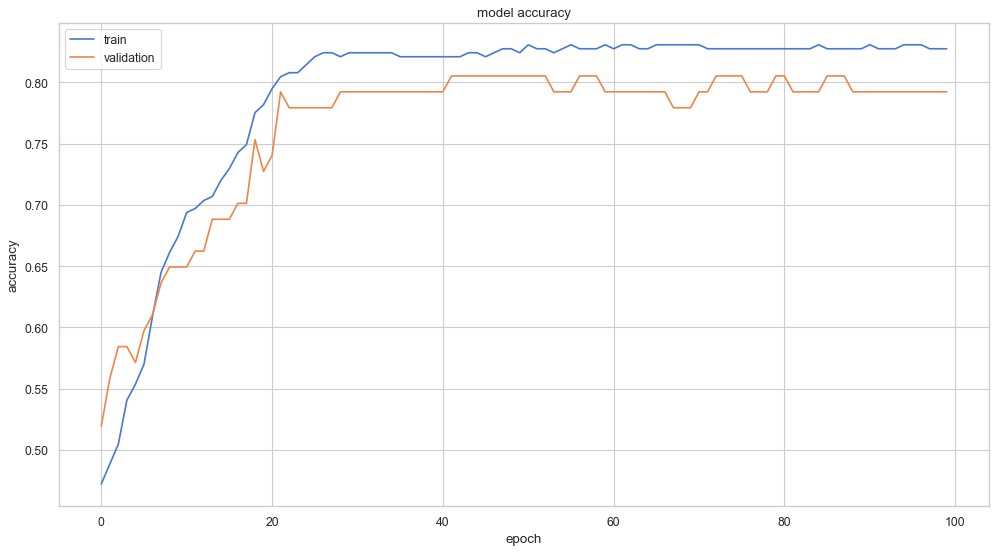

In [33]:
# summarize history for accuracy score
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Let's use grid search to find out what the optimal values for batch_size and epochs

In [34]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [65, 125]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2, n_jobs=-1)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   30.7s finished


In [35]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820312 using {'batch_size': 16, 'epochs': 65}
0.820312 (0.031894) with: {'batch_size': 16, 'epochs': 65}
0.820312 (0.031894) with: {'batch_size': 16, 'epochs': 125}
0.820312 (0.031894) with: {'batch_size': 32, 'epochs': 65}
0.820312 (0.031894) with: {'batch_size': 32, 'epochs': 125}
0.812500 (0.029232) with: {'batch_size': 64, 'epochs': 65}
0.820312 (0.031894) with: {'batch_size': 64, 'epochs': 125}


Let's use grid search to find out what the optimal values for optimizer.

In [37]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=   1.8s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .......................................... opt=SGD, total=   1.9s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   2.3s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   2.5s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   2.3s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   2.2s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   2.5s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=   2.8s
[CV] opt=Adagrad .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   49.0s finished


In [38]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820312 using {'opt': 'RMSprop'}
0.815104 (0.028764) with: {'opt': 'SGD'}
0.820312 (0.031894) with: {'opt': 'RMSprop'}
0.820312 (0.031894) with: {'opt': 'Adagrad'}
0.820312 (0.031894) with: {'opt': 'Adadelta'}
0.820312 (0.031894) with: {'opt': 'Adam'}
0.820312 (0.031894) with: {'opt': 'Nadam'}


Let's use grid search to find out what the optimal values for hidden layers and neurons. 

In [39]:
seed(42)
set_random_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[10],[10,5],[10,10],[20,10,5]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] lyrs=[10] .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................ lyrs=[10], total=   3.8s
[CV] lyrs=[10] .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ........................................ lyrs=[10], total=   3.9s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   4.0s
[CV] lyrs=[10, 5] ....................................................
[CV] ..................................... lyrs=[10, 5], total=   4.5s
[CV] lyrs=[10, 5] ....................................................
[CV] ..................................... lyrs=[10, 5], total=   4.3s
[CV] lyrs=[10, 5] ....................................................
[CV] ..................................... lyrs=[10, 5], total=   4.2s
[CV] lyrs=[10, 10] ...................................................
[CV] .................................... lyrs=[10, 10], total=   4.6s
[CV] lyrs=[10, 10] ...................................................
[CV] .................................... lyrs=[10, 10], total=   4.6s
[CV] lyrs=[10, 10] ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   54.8s finished


In [40]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820312 using {'lyrs': [10]}
0.820312 (0.031894) with: {'lyrs': [10]}
0.815104 (0.032106) with: {'lyrs': [10, 5]}
0.820312 (0.031894) with: {'lyrs': [10, 10]}
0.820312 (0.031894) with: {'lyrs': [20, 10, 5]}


Let's use grid search to find out what the optimal values for dropouts. 

In [41]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... dr=0.0, total=   5.3s
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] ........................................... dr=0.0, total=   5.4s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   5.4s
[CV] dr=0.01 .........................................................
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[CV] .......................................... dr=0.01, total=   6.1s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   6.0s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   6.0s
[CV] dr=0.05 .........................................................
[CV] .......................................... dr=0.05, total=   6.3s
[CV] dr=0.05 .........................................................
[CV] ............................

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.0min finished


In [42]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820312 using {'dr': 0.0}
0.820312 (0.031894) with: {'dr': 0.0}
0.820312 (0.031894) with: {'dr': 0.01}
0.820312 (0.031894) with: {'dr': 0.05}
0.817708 (0.032106) with: {'dr': 0.1}
0.812500 (0.035516) with: {'dr': 0.2}
0.815104 (0.028764) with: {'dr': 0.5}


In [43]:
# create final model
model = create_model(lyrs=[10], dr=0.0, opt = 'RMSprop', )

print(model.summary())

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 10)                210       
_________________________________________________________________
dropout_54 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
# train model on full train set, with 80/20 cross validation split
training = model.fit(x_train, y_train, epochs=65, batch_size=16, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

384/384 [==============================] - 0s 98us/step

acc: 81.77%


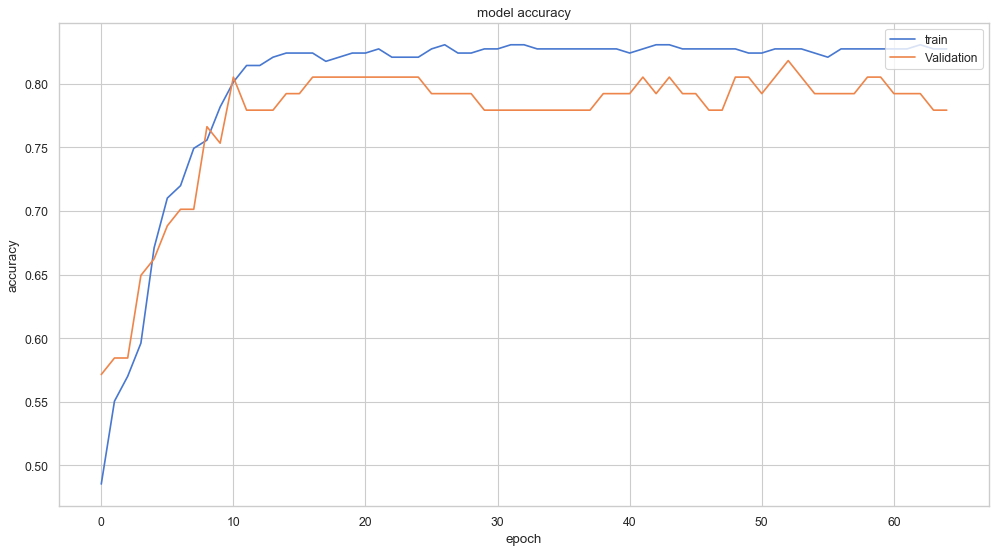

In [45]:
# summarize history for accuracy
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [46]:
# calculate predictions
predictions=model.predict(x_test)

In [47]:
# Create the submission file using tunned ridge regressor using GridSearch (rgrid) and submit!
preds = pd.DataFrame(predictions, columns=['Neural Network'])
preds.to_csv('NNLoanPrecictions.csv')

Here we have analysed one bagging and 3 boosting models. Neural Nework has also created for this dataset. Finally predictions from the neural netwrok model saved as csv file. After optimizing the hyperparameters using GridSeach we have improved accuracy score by 4%.